<a href="https://colab.research.google.com/github/MarcosCosta-Py/DSNP/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito_(M%C3%B3dulo4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraudes em Cartões de Crédito**

<img src="https://www.websystemer.no/wp-content/uploads/2020/06/deteccao-de-fraudes-em-cartoes-de-credito-com-data-science-machine-learning-800x445.jpg" width="70%">

*by [Marcos Costa](https://www.linkedin.com/in/ds-marcos-costa/)*

------------------------

O problema de fraudes em cartões de créditos assolam bancos e fintechs há muito tempo e mesmo com o lançamento de novas ferramentas de segurança, como a disseminação dos chips e desbloqueio por senha, não tem impedido tais infrações, pois as mesmas vão se atualizando também. 

Agora, mais do que nunca, as fraudes dependem em grande parte, da disponibilização de dados pessoais, que são obtidos na maioria das vezes através da internet, seja por meio de compras em sites não seguros ou por invasões na rede. 

Os índices desse tipo de crime aumentam principalmente em épocas comemorativas ou nos dias de promoções em lojas, como por exemplo no Natal e Black Friday, respectivamente.

No Brasil, mais de 12 milhões de pessoas sofreram alguma fraude financeira entre 2018 e 2019 e dentre todos internautas do país, cerca de 46% foram vítimas de golpes, que já chegaram a somar R$ 1,8 bilhão em prejuízos nesse período. 

Um outro fator a ser considerado é a quantidade vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente, isso porque o sistema classificou essa operação como suspeita de fraude, os chamados falsos positivos.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

[Fonte1](https://veja.abril.com.br/economia/como-funcionam-as-novas-fraudes-com-cartao-de-credito/) [Fonte2](https://avozdaserra.com.br/noticias/mais-de-12-milhoes-de-brasileiros-sofreram-alguma-fraude-financeira-no-ultimo-ano)

## **Objetivo de estudo**

Por meio deste projeto, ao qual será realizado uma análise exploratória dos dados e a aplicação de um modelo de machine learning, tenho como objetivo identificar as principais características dos dados a fim de prepara-los para validar o algoritmo que irá prever se uma trasação é fraude ou não. Mais precisamente dizendo, classificar de maneira eficaz uma operação não desejada.

## **Obtenção dos dados**

Os [dados](https://www.kaggle.com/mlg-ulb/creditcardfraud) que usaremos neste projeto contêm transações realizadas com cartões de crédito em setembro de 2013 e foram disponibilizados de forma anonimizada por empresas européias. Especificamente retratando, são informações referentes a dois dias de transações, apenas.

De quase 285 mil operações feitas, temos que apenas 492 foram fraudes, cerca de 0.172%, concluindo que a base de dados é altamente desequilibrada.

Além do mais, a maioria das variáveis foram submetidas a um processo de transformação conhecida como *Análise de componentes principais (PCA),* que permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes.** 

Com isso, temos como entrada apenas valores numéricos e por medidas de privacidade e segurança, essas features transformadas foram descaracterizadas, recebendo os labels que variam no seguinte intervalo: $[V1, V2, V3 \dots, V28]$, mantendo explícita, apenas as variáveis: `Time`, `Amount`	e `Class`.




## **Importando os dados**

Para facilitar a importação dos dados, vamos utilizar do método `pd.read_csv`, do pandas, passando o [link](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1) de interesse.

Mas antes devemos carregar as bibliotecas de interesse para o estudo.

In [1]:
# instalar a biblioteca scikit-plot
!pip install scikit-plot -q

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# link com os dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

## **Análise Exploratória dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento das composições básicas da estrutura do DataFrame.

In [4]:
# ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# verificar o dimensão do DataFrame
df.shape

(284807, 31)

É possível verificar que o DataFrame possui 284807 entradas e 31 colunas

In [6]:
# verificar algumas informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Como relatado anteriormente, temos que todas as variáveis são numéricas, mais espeficicamente falando, 30 são contínuas e apenas 1 é do tipo inteiro, no caso a *Class.*

In [7]:
# verificar se há valores faltantes nos dados
df.isnull().mean()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Através da informação acima, podemos verificar que a base de dados é completa, não possuindo valores ausentes.

#### Abaixo, verificaremos a quantidade de transações que foram classificadas como fraudes ou não.

In [8]:
# frequência absoluta da quantidade de transações normais e fraudulentas
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# frequência percentual da quantidade de transações normais e fraudulentas
round(df['Class'].value_counts()/ len(df['Class'])*100,2)

0    99.83
1     0.17
Name: Class, dtype: float64

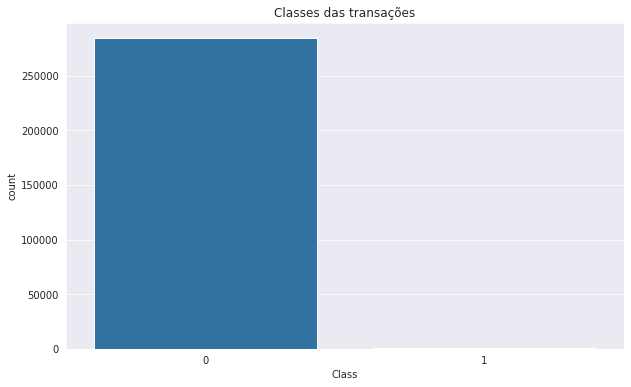

In [10]:
# gráfico de barras para quantidade de transações normais e fraudulentas
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(df.Class)
plt.title("Classes das transações");

Com base nas tabelas de frequência e no gráfico acima, podemos confirmar o desbalanceamento dos dados, visto que mais de 99% das entradas, referem-se a transações genuínas. Já as que se referem a fraude é tão baixa (492) em meio a quantidade total, que nem é perceptível no gráfico.

In [11]:
# informações estatísticas dos dados
round(df.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


A tabela acima nos apresenta a informação de que as variáveis fornecidas pelo método de *Análise de componentes principais*, $[V1,...,V28]$, têm média 0 (zero) e um desvio padrão baixo, que segue uma ordem decrescente de V1 para V28, partindo de 1.96 à 0.33, respectivamente. Isso indica que os dados já estão normalizados.

#### No passo a seguir, plotaremos primeiro a distribuição das variáveis selecionadas pelo método PCA, ao qual separamos em cores diferentes para distinguir uma operação normal de uma fraude.

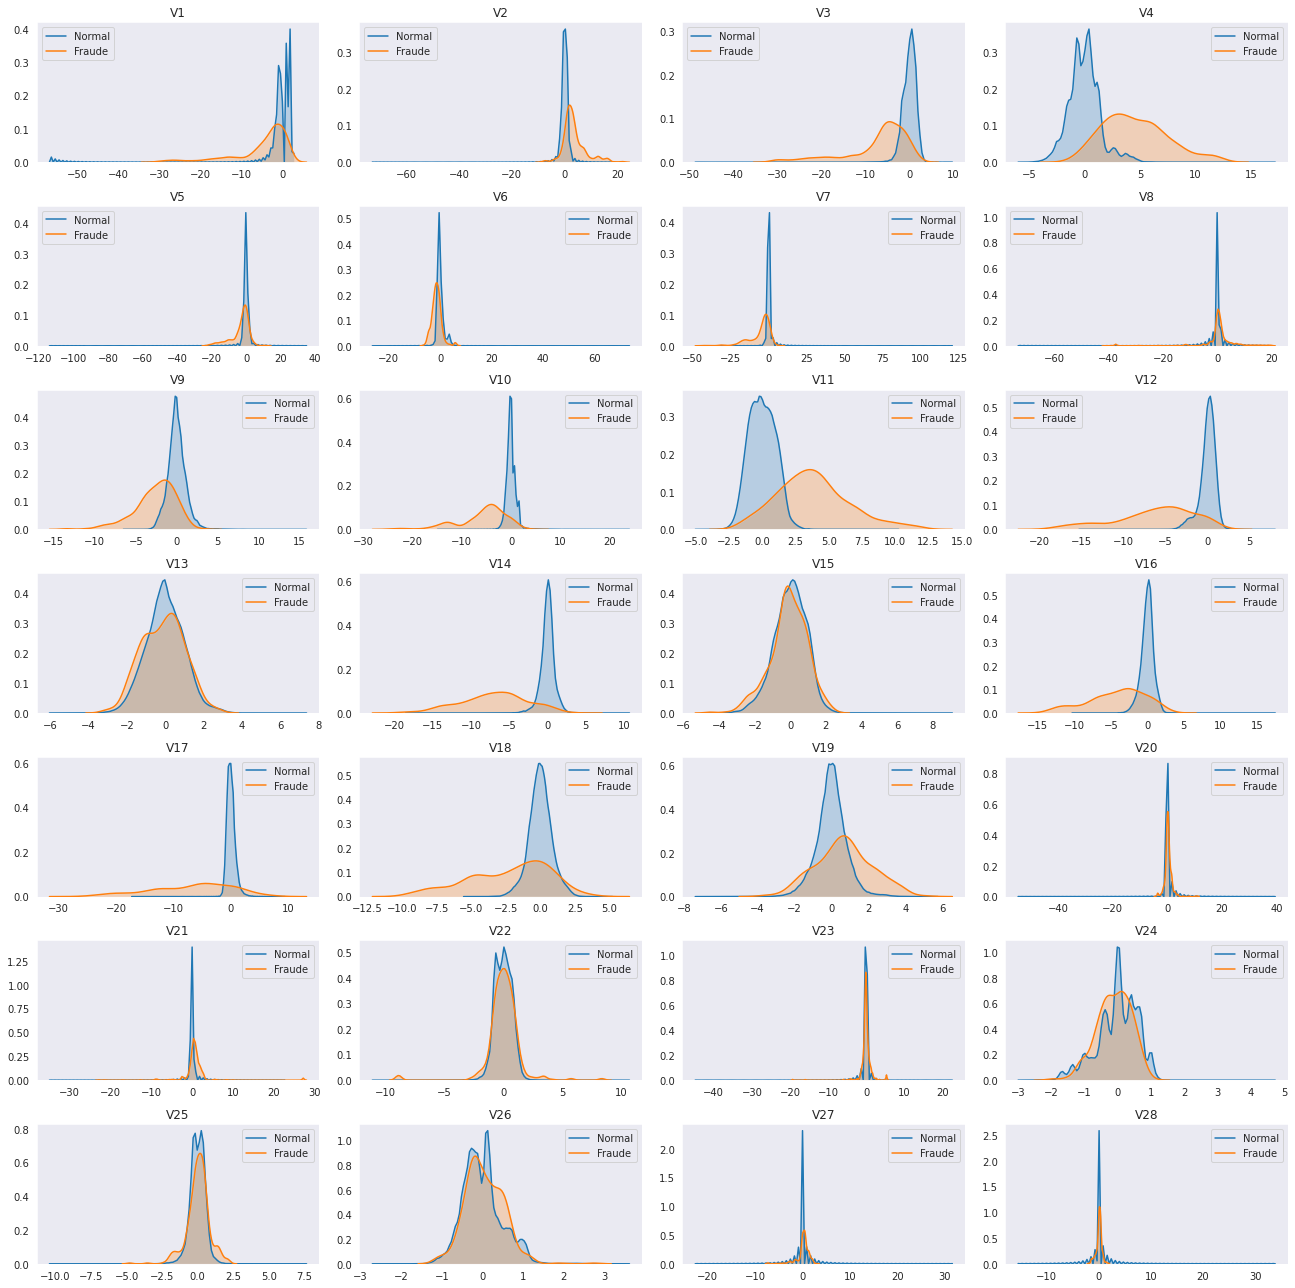

In [12]:
sns.set_style('dark')
columns_int = df.drop(['Time','Amount','Class'], axis=1).columns
df_normal = df.query('Class == 0')
df_fraude = df.query('Class == 1')

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(18,18))

i = 0
for column in columns_int:
  # na contagem dos subplots não inicia-se no 0, por isso já adicionamos 1
  i += 1
  plt.subplot(7,4,i)
  sns.kdeplot(df_normal[column], label="Normal", shade=True)
  sns.kdeplot(df_fraude[column], label="Fraude", shade=True)
  plt.title(column)

plt.tight_layout()  

Analisando as distribuições das variáveis, percebemos que há bastante diferença entre os pontos de concentração de fraudes e transações normais, visto que operações regulares possuem menor variação nos dados principais.

#### Agora verificaremos a distribuição do tempo e de valores para as transações normais e fraudulentas, com intuito de verificar se há alguma diferença.

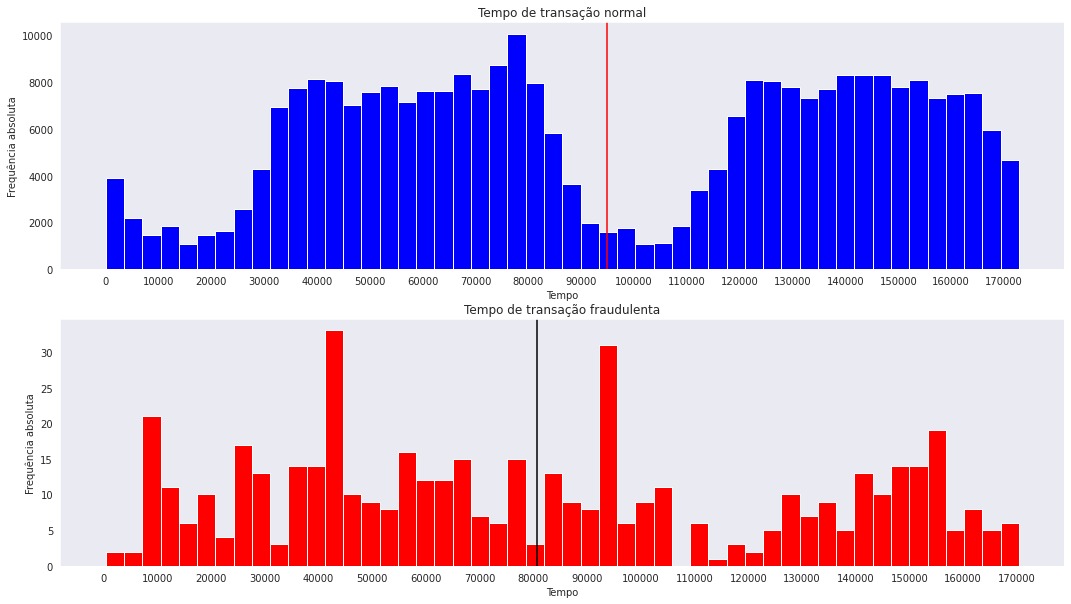

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,10))

# histograma de tempo para transações normais
ax1.hist(df.query("Class == 0")['Time'],bins=50,color='b')
ax1.axvline(df.query("Class == 0")['Time'].mean(), label="Média", c='red')
ax1.set_title('Tempo de transação normal')
ax1.set_xticks(range(0,180000, 10000))
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Frequência absoluta');

# histograma de tempo para transações com fraude
ax2.hist(df.query("Class == 1")['Time'],bins=50,color='r')
ax2.axvline(df.query("Class == 1")['Time'].mean(), label="Média", c='black')
ax2.set_title('Tempo de transação fraudulenta')
ax2.set_xticks(range(0,180000, 10000))
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Frequência absoluta');

Como podemos perceber, transações regulares têm maior concentração de tempo em torno de 75000 à 80000 segundos, havendo uma queda no intervalo de 90000 à 115000, enquanto isso, as fraudes destacam tempos próximos de 45000 e 95000 segundos.  

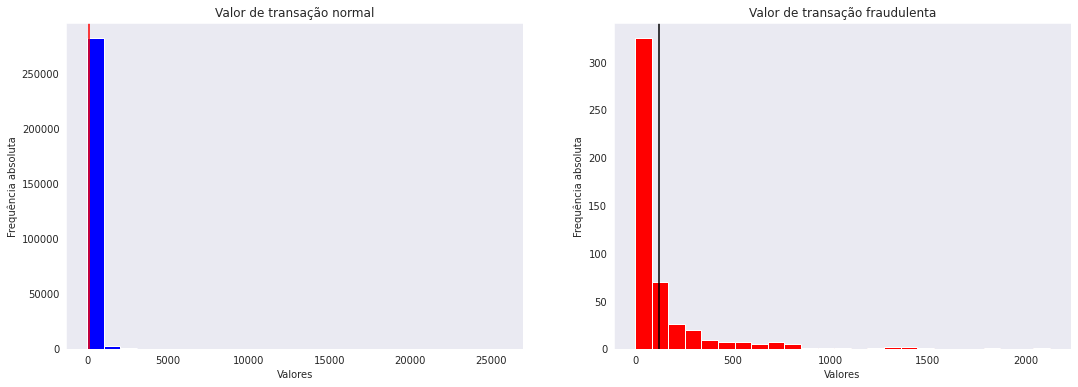

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# histograma de valores para transações normais
ax1.hist(df.query("Class == 0")['Amount'],bins=25,color='b')
ax1.axvline(df.query("Class == 0")['Amount'].mean(), label="Média", c='red')
ax1.set_title('Valor de transação normal')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frequência absoluta');

# histograma de valores para transações com fraude
ax2.hist(df.query("Class == 1")['Amount'],bins=25,color='r')
ax2.axvline(df.query("Class == 1")['Amount'].mean(), label="Média", c='black')
ax2.set_title('Valor de transação fraudulenta')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Frequência absoluta');

Os gráficos acima, deixa evidente que os valores de transações normais, na maioria das vezes são baixos, havendo sim operações com valores altos (acima de 5000), mas em poucos casos, o que os tornam outliers nos dados.

Porém, as fraudes também possuem valores baixos, não ultrapassando os 3000. Isso ocorre justamente para que os desvios desses dinheiros passem despercebidos em meio as tarifas pessoais.

#### Para que se tenha uma melhor percepção da distribuição dos valores tanto em transações normais quanto nas fraudes, iremos plotar o box-plot. Ademais, será possível melhor visualizar os outliers presentes nessa variável, assim como algumas infromações estatísticas específicas.

In [15]:
# resumo estatístico dos valores das operações
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
# calculando um limite de dois desvios padrões a partir da média para melhor visualizar os box-plots
two_std = df['Amount'].describe()[1] + 2* df['Amount'].describe()[2]
two_std

588.5898377313177

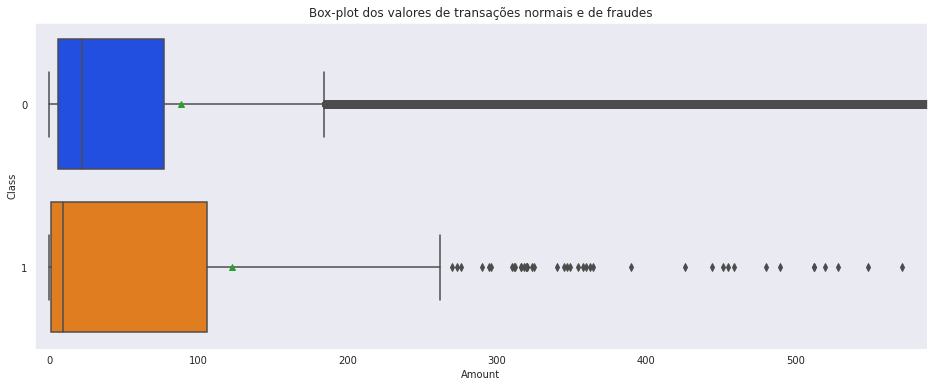

In [17]:
# Box-plot dos valores de transações normais e fraudes
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot('Amount','Class', data=df, orient='h', palette='bright', showmeans=True, ax=ax)
ax.set_xlim(left=-10, right=two_std)
plt.title('Box-plot dos valores de transações normais e de fraudes');

Com base nas informações acima, vemos que a variável `Amount` tem uma média de valor 88.34, e um desvio padrão muito alto(250.12), o que significa que esses dados são afetados por valores fora do padrão, como é o caso da transação máxima de 25691.16 e que não é fraude.

Mais precisamente analisando os box-plots, temos que a concentração de 50% dos dados centrais para operações regulares, variam de 8 à 70, enquanto para fraudes, os valores variam de 1 à 100, aproximadamente.

**obs: a imagem dos box-plots apresentam um limite de dois desvios padrões a partir da média geral para melhor visualiza-los, já que os demais pontos se encarregam de outliers**

#### Abaixo, vamos plotar uma matriz de correlação e identificar as variáveis qua mais se relacionam.

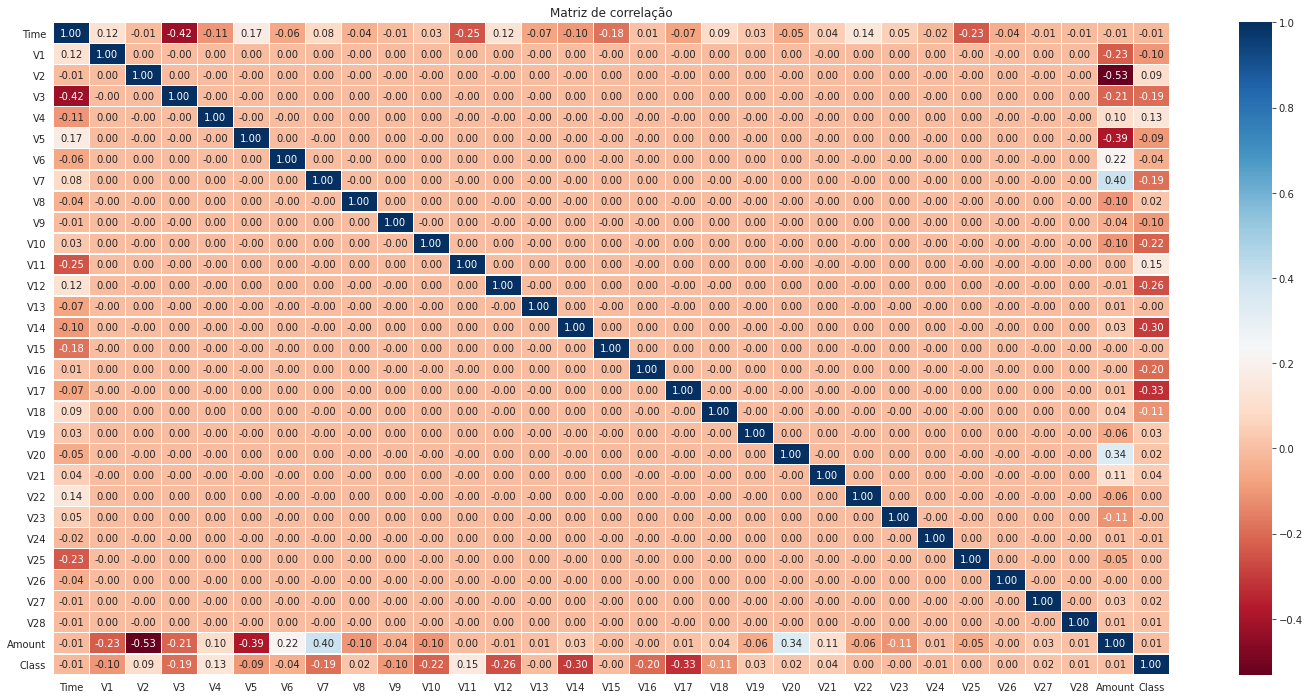

In [18]:
# criando a matriz de correlação
corr = df.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr, linewidths=0.5, fmt=".2f", annot=True, linecolor='white',cmap='RdBu')
plt.title('Matriz de correlação');

A matriz acima, apresenta poucas variáveis correlacionadas e com intensidades medianas, por exemplo: `V3` e `Time` com *-0.42*, `Amount` e `V2` com *-0.53* e `Amount` e `V7` com *0.40*. Isso talvez ocorra, porque as classes de fraudes e transações normais, possuem um grande desbalanceamento. 

## **Preparação dos Dados**

#### Inicialmente vamos normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`). Mas antes vamos fazer uma cópia do DataFrame pra realizar as alterações.

In [19]:
# copiar o dataframe
df_clean = df.copy()

In [20]:
# normalizar as variáveis Time e Amount
scaler = StandardScaler()

df_clean['Time_norm'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1,1)) 
df_clean['Amount_norm'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'], axis=1, inplace=True)
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_norm,Amount_norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


#### O procedimento a seguir, consistirá na divisão do conjunto de dados em treino e teste

In [21]:
# dividir o conjunto de dados em treino e teste
X = df_clean.drop("Class", axis=1)
y = df_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, shuffle=True, random_state=0)

0    284315
1       492
Name: Class, dtype: int64

Apenas 0.173% do dataset representa fraudes



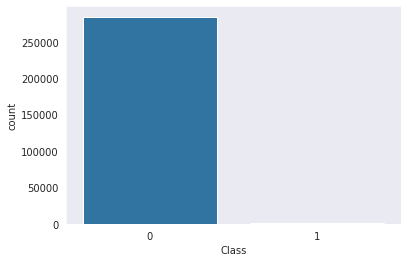

In [22]:
# verificar novamente como esta distribuida a quantidade de classes, entre regular e fraude.
print(df_clean.Class.value_counts())
print('\nApenas {:.3f}% do dataset representa fraudes\n'.format(len(df_clean[df_clean["Class"]==1])/len(df_clean)*100))

sns.countplot("Class", data=df_clean);

É perceptível o quanto o nosso conjunto de dados está desbalanceado, havendo muitas transações normais e cerca de 0.17% de fraudes, apenas. Isso é um problema para a construção de algoritmos de previsão, pois as informações não distribuidas corretamente provocam viés no modelo.

#### Para verificar o fato acima, primeiro iremos criar um modelo com os dados desbalanceados e depois iremos utilizar dois métodos distintos para fazer o balanceamento e analisar a eficácia no algoritmo, que será mensurado através de algumas métricas de classificação, tais como: `Classification_report`, `Accuracy_score`, `Roc_auc_score` e `Confusion_matrix`.

## **Modelo de Machine Learning sem balanceamento**

A seguir, será construido um modelo de *Regressão Logística* nos dados sem balanceamento e avaliaremos o desempenho por meio das métricas de classificação.

In [23]:
np.random.seed(1)

# instanciar e treinar o modelo
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)

# fazer previsão
y_pred = modelo_lr.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8774    0.6284    0.7323       148

    accuracy                         0.9992     85443
   macro avg     0.9384    0.8141    0.8659     85443
weighted avg     0.9991    0.9992    0.9991     85443

Acurácia: 0.9992

AUC: 0.8141



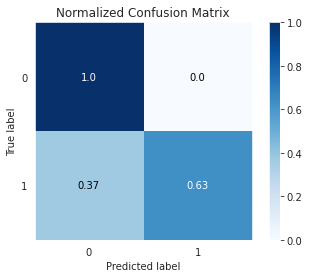

In [24]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

O modelo que contém os dados desbalanceados apresentou uma boa acurácia, mas ao analisar o que o nosso objetivo determina, que é a identificação de fraudes da maneira mais precisa possível, temos uma porcentagem de acerto de apenas 0.63.

#### A primeira técnica a ser aplicada de balanceamento dos dados é o *Under-sampling*, que consiste em eliminar aleatoriamente entradas da classe com o maior número de ocorrências, deixando uma porcentagem de 0.5 para cada característica.

1    344
0    344
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


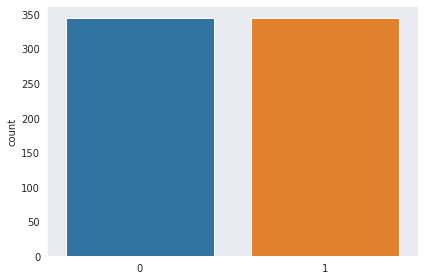

In [25]:
# usar a técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res)

plt.tight_layout();

In [26]:
# dimensão do conjunto de treino
print(X_res.shape)

(688, 30)


Como temos 344 entradas para cada classe da variável, o novo conjunto de treino (X_res) terá uma dimensão de 688 linhas por 30 colunas e o conjunto de teste continua o mesmo (X_test).

#### Dado que temos o conjunto de treino inicial (X_train) e o balanceado (X_res), podemos comparar como é a correlação em cada caso.

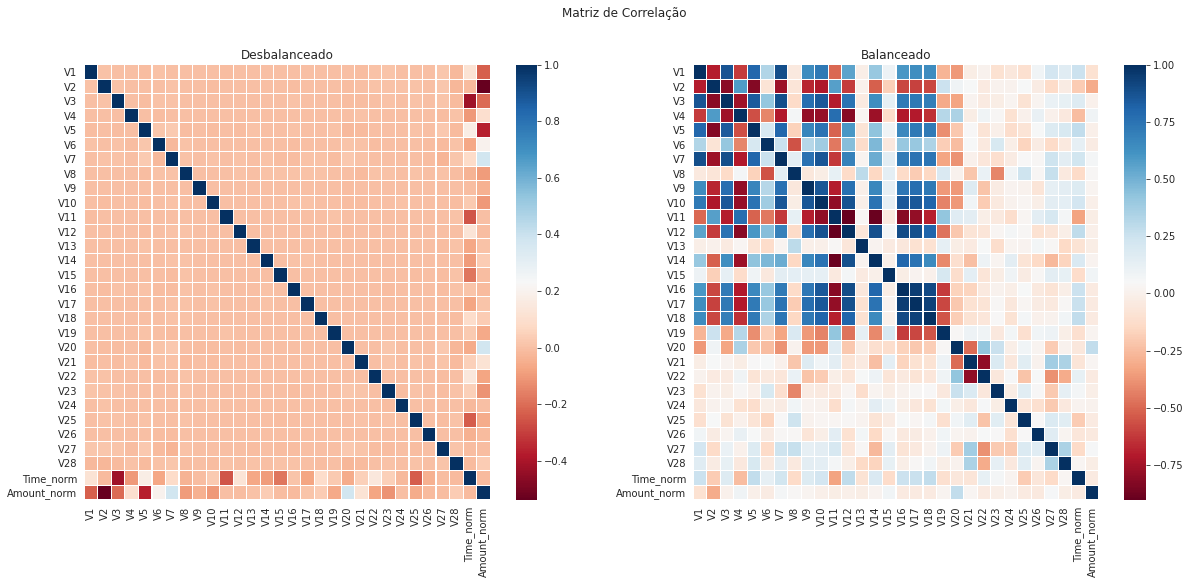

In [27]:
# plotar a matriz de correlação
corr_train = X_train.corr()
corr_res = pd.DataFrame(X_res).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr_train, xticklabels=corr_train.columns, yticklabels=corr_train.columns,
            linewidths=.1, cmap="RdBu", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_res, xticklabels=corr_train.columns, yticklabels=corr_train.columns,
            linewidths=.1, cmap="RdBu", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Com o ajuste no tamanho da amostra, fica evidente que as variáveis passam a ter melhores relações, permitindo obter resultados mais precisos.

## **Modelos de Machine Learning com os dados balanceados pelo método Under-sampling**

### **Primeiro modelo: *Regressão Logística***

In [28]:
np.random.seed(1)
# instanciar e treinar o modelo
modelo_lrb = LogisticRegression()
modelo_lrb.fit(X_res, y_res)

# fazer previsão
y_pred_lr = modelo_lrb.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9610    0.9801     85295
           1     0.0390    0.9122    0.0749       148

    accuracy                         0.9609     85443
   macro avg     0.5194    0.9366    0.5275     85443
weighted avg     0.9982    0.9609    0.9785     85443

Acurácia: 0.9609

AUC: 0.9366



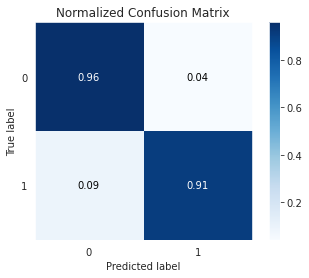

In [29]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))

#### Para melhor entender sobre a métrica acima, basta analisarmos os plots abaixo e a interpretação da imagem logo em seguida.

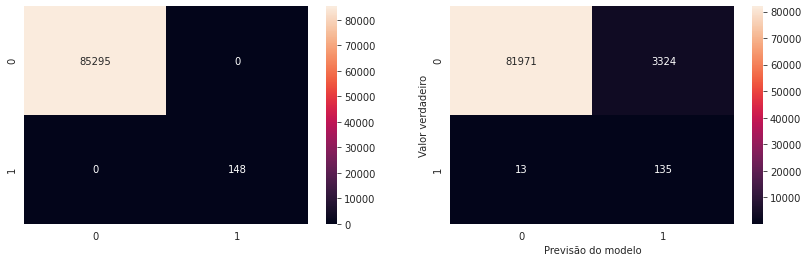

In [30]:
# valores corretos vs valores pretidos corretamente (frequência absoluta)
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(14,4)) 
sns.heatmap(confusion_matrix(y_test, y_test), annot=True, fmt='d', ax=ax1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d',ax=ax2)
plt.xlabel("Previsão do modelo")
plt.ylabel("Valor verdadeiro");

Basicamente, a primeira imagem que está preenchida com valores apenas na diagonal principal, indica o quanto de cada classe esta sendo representada verdadeiramente no conjunto de dados, e a na segunda imagem, ainda na diagonal principal temos o quanto o modelo classificou para cada classe. Então, basta dividirmos o quanto houve de acerto, pelo total da classe verdadeira. Apresentando a porcentagem da matriz de confusão inicial (em azul).

Com relação ao desempenho do modelo, percebemos que houve um melhor resultado de nosso interesse, ao qual temos agora um *Recall* de 0.91 de acertos para identificar transações fraudulentas.

#### A ideia da implementação do código abaixo é verificar o desempenho do modelo de *Regressão Logística* para diferentes tamanhos de amostras de previsões, calculando a média dos valores obtidos para o *Recall_Score*, com intuito de analisar se o desempenho do modelo se altera muito para amostras diferentes, já que o treinamos com 688 entradas e testamos com 85443 entradas, anteriormente.

#### O tamanho dos conjuntos de dados para os testes será obtido através de subconjuntos do *X_test* original, para garantirmos que nenhuma entrada da base de treino esteja também na base de teste. E como *X_test* é composto por 85443 linhas, extraimos dessa quantidades, porcentagens que vão de 0.002 à 0.997, com espaçamentos de 0.005, obtendo assim, 200 tamanhos de amostras diferentes que não estão balanceadas, o que garante realmente a eficácia do algoritmo.

In [31]:
# gera os tamanhos das amostras
amostras = [0.002]
i = 0
while i < 199:
    amostras.append(amostras[i]+0.005)
    i +=1

In [32]:
# faz as previsões com os diferentes tamanhos de amostras e armazena o Recall_score
recall = []
for j in range(len(amostras)):
  X_treino, X_TESTE, y_treino, y_TESTE = train_test_split(X_test, y_test, stratify=y_test, test_size=amostras[j], shuffle=True, random_state=0)
  
  y_PRED = modelo_lrb.predict(X_TESTE)
  recall.append(recall_score(y_TESTE, y_PRED))
  j += 1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# valores obtidos para o Recall_score
print(recall)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9090909090909091, 0.9090909090909091, 0.9166666666666666, 0.9230769230769231, 0.9285714285714286, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9411764705882353, 0.9444444444444444, 0.9473684210526315, 0.95, 0.95, 0.9523809523809523, 0.9545454545454546, 0.9545454545454546, 0.9130434782608695, 0.9166666666666666, 0.92, 0.92, 0.9230769230769231, 0.9259259259259259, 0.9285714285714286, 0.9285714285714286, 0.9310344827586207, 0.9333333333333333, 0.9354838709677419, 0.9354838709677419, 0.9375, 0.9393939393939394, 0.9117647058823529, 0.9117647058823529, 0.9142857142857143, 0.9166666666666666, 0.918918918918919, 0.918918918918919, 0.9210526315789473, 0.9230769230769231, 0.925, 0.925, 0.926829268292683, 0.9285714285714286, 0.9285714285714286, 0.9302325581395349, 0.9318181818181818, 0.9333333333333333, 0.9333333333333333, 0.9347826086956522, 0.9361702127659575, 0.9375, 0.9375, 0.9387755102040817, 0.

In [34]:
# média dos Recall_score
sum(recall) / len(recall)

0.923110233125939

Como podemos perceber, para as 200 amostras diferentes, grande parte do *Recall_score* obtido está acima do 0.90 e temos uma média de 0.923. Isso significa que o modelo está tendo um bom desempenho para diversos conjuntos de dados.

### **Segundo modelo: *Árvore de Decisão***



In [35]:
np.random.seed(1)
# instanciar e treinar o modelo
modelo_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
modelo_tree.fit(X_res, y_res)

# fazer a previsão
y_pred_tree = modelo_tree.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9222    0.9594     85295
           1     0.0198    0.9054    0.0387       148

    accuracy                         0.9222     85443
   macro avg     0.5098    0.9138    0.4991     85443
weighted avg     0.9981    0.9222    0.9578     85443

Acurácia: 0.9222

AUC: 0.9138



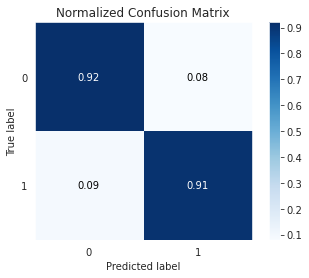

In [36]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_tree)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

O modelo de *Árvore de Decisão* obteve um desempenho inferior quando comparado ao de *Regressão Logística*, com relação a acurácia, que foi de 92%. Já o **Recall_score** para detecção de fraude manteve-se semelhante.

#### Abaixo está a representação de como é o desenvolvimento de um modelo de *Árvore de Decisão*, deixando claro as técnicas das condições para obter uma resposta.

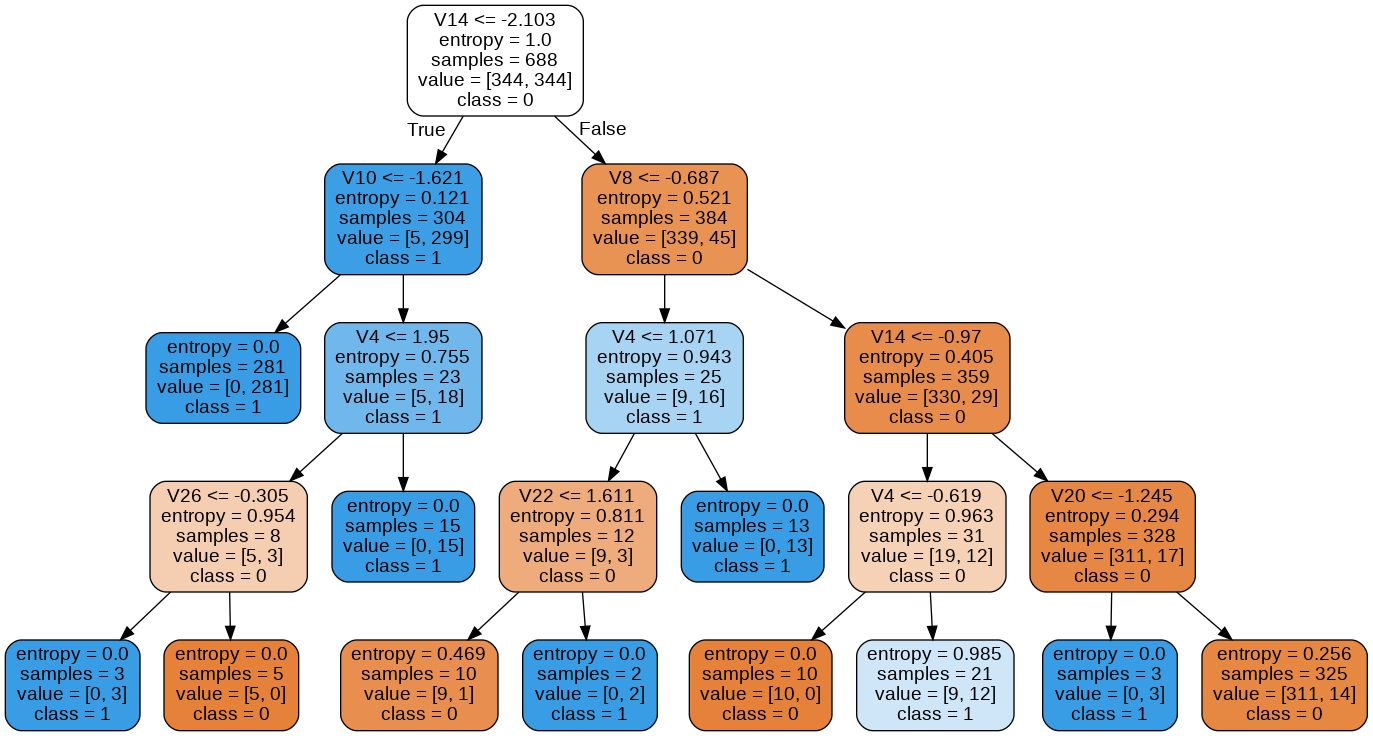

In [37]:
# criar DOT 
dot = export_graphviz(modelo_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

### **Terceiro modelo: *Floresta Aleatória***

In [38]:
np.random.seed(1)
# instanciar e treinar o modelo
modelo_forest = RandomForestClassifier(n_estimators=50, max_depth=3)
modelo_forest.fit(X_res,y_res)

# fazer a previsão
y_pred_forest = modelo_forest.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9902    0.9949     85295
           1     0.1306    0.8514    0.2264       148

    accuracy                         0.9899     85443
   macro avg     0.5652    0.9208    0.6107     85443
weighted avg     0.9982    0.9899    0.9936     85443

Acurácia: 0.9899

AUC: 0.9208



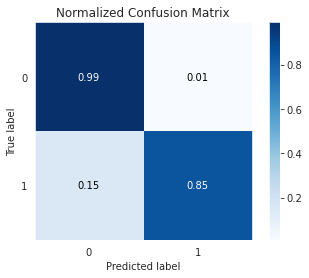

In [39]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_forest, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_forest, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_forest)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_forest)))

O terceiro modelo usado com o método *Under-sampling*, a *Floresta Aleatória* obteve um excelente acurácia geral, porém, o **Recall_score** para detecção de fraude foi bem mais inferior do que os algoritmos acima, representando apenas 0.85 de acertos.

#### A segunda técnica a ser aplicada de balanceamento dos dados é o *Over-sampling*, que consiste em criar novas observações da classe minoritátia a partir das informações contidas nos dados originais, deixando uma porcentagem de 0.5 para cada característica também.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    199020
0    199020
dtype: int64


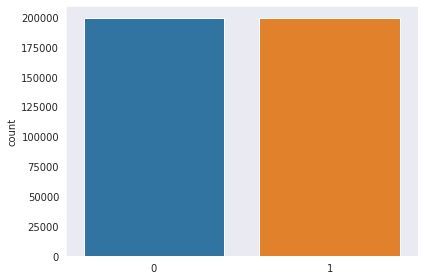

In [40]:
# usar a técnica Over-sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_ros).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_ros)

plt.tight_layout();

In [41]:
# dimensão do conjunto de treino
print(X_ros.shape)

(398040, 30)


Como temos 199020 entradas para cada classe da variável, o novo conjunto de treino (X_ros) terá uma dimensão de 398040 linhas por 30 colunas e o conjunto de teste continua o mesmo (X_test).

## **Modelos de Machine Learning com os dados balanceados pelo método Over-sampling**

### **Primeiro modelo: *Regressão Logística***

In [42]:
np.random.seed(1)

#instanciar e treinar o modelo
modelo_lro = LogisticRegression(max_iter=200)
modelo_lro.fit(X_ros, y_ros)

# fazer a previsão
y_pred_lro = modelo_lro.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9785    0.9890     85295
           1     0.0675    0.8986    0.1255       148

    accuracy                         0.9783     85443
   macro avg     0.5336    0.9385    0.5573     85443
weighted avg     0.9982    0.9783    0.9875     85443

Acurácia: 0.9783

AUC: 0.9385



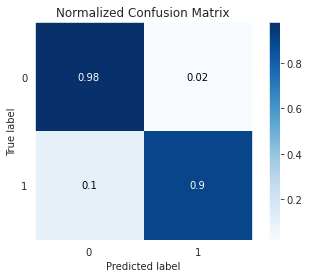

In [43]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lro, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lro, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lro)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lro)))

A implementação da *Regressão Logística* treinada com a base obtida pelo método *Over-sampling* de balanceamento, teve um excelente desempenho para detecção de transações normais com um *Recall_score* de 0.98 e também teve uma boa avaliação na detecção de fraudes, com uma pocentagem de 0.90 de acertos.

#### Verificar a eficácia do modelo para diferentes amostras.

In [44]:
# gera os tamanhos das amostras
amostras_o = [0.002]
i = 0
while i < 199:
    amostras_o.append(amostras_o[i]+0.005)
    i += 1

In [45]:
# faz as previsões com os diferentes tamanhos de amostras e armazena o Recall_score
recall_o = []
for j in range(len(amostras_o)):
  X_treino, X_TESTEO, y_treino, y_TESTEO = train_test_split(X_test, y_test, stratify=y_test, test_size=amostras_o[j], shuffle=True, random_state=0)
  
  y_PREDO = modelo_lro.predict(X_TESTEO)
  recall_o.append(recall_score(y_TESTEO, y_PREDO))
  j += 1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# valores para o Recall_score
print(recall_o)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9090909090909091, 0.9090909090909091, 0.9166666666666666, 0.9230769230769231, 0.9285714285714286, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9411764705882353, 0.9444444444444444, 0.9473684210526315, 0.95, 0.95, 0.9523809523809523, 0.9545454545454546, 0.9545454545454546, 0.9130434782608695, 0.9166666666666666, 0.92, 0.92, 0.9230769230769231, 0.9259259259259259, 0.9285714285714286, 0.9285714285714286, 0.9310344827586207, 0.9333333333333333, 0.9354838709677419, 0.9354838709677419, 0.9375, 0.9393939393939394, 0.9117647058823529, 0.9117647058823529, 0.9142857142857143, 0.9166666666666666, 0.918918918918919, 0.918918918918919, 0.9210526315789473, 0.9230769230769231, 0.925, 0.925, 0.926829268292683, 0.9285714285714286, 0.9285714285714286, 0.9302325581395349, 0.9318181818181818, 0.9333333333333333, 0.9333333333333333, 0.9347826086956522, 0.9361702127659575, 0.9375, 0.9375, 0.9387755102040817, 0.

In [47]:
# média do Recall_score
sum(recall_o) / len(recall_o)

0.9122983273615456

Como podemos conferir acima, o modelo obteve a maior parte do *Recall_score* acima de 0.88 para os diferentes tipos e tamanhos de amostras, tendo em média 0.91. Isso implica que o modelo está não perde sua eficácia para fazer previsões em novos dados.

### **Segundo modelo: *Árvore de Decisão***

In [48]:
np.random.seed(1)
# instanciar e treinar o modelo
modelo_treeo = DecisionTreeClassifier(max_depth=4, criterion="entropy")
modelo_treeo.fit(X_ros, y_ros)

# fazer a previsão
y_pred_treeo = modelo_treeo.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9657    0.9824     85295
           1     0.0416    0.8581    0.0794       148

    accuracy                         0.9655     85443
   macro avg     0.5207    0.9119    0.5309     85443
weighted avg     0.9981    0.9655    0.9809     85443

Acurácia: 0.9655

AUC: 0.9119



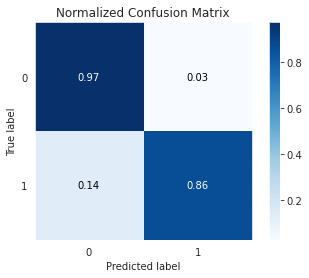

In [49]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_treeo, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_treeo, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_treeo)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_treeo)))

Aqui a *Árvore de Decisão* desempenhou um bom trabalho para fazer previsões na detecção de transações regulares, com uma porcentagem de acerto de 0.97, já para detectar fraude, o desempenho foi mais baixo do que no modelo anterior, com apenas 0.86 de acerto.

#### A seguir, iremos plotar as condições de escolhas dessa *Árvore de Decisão*

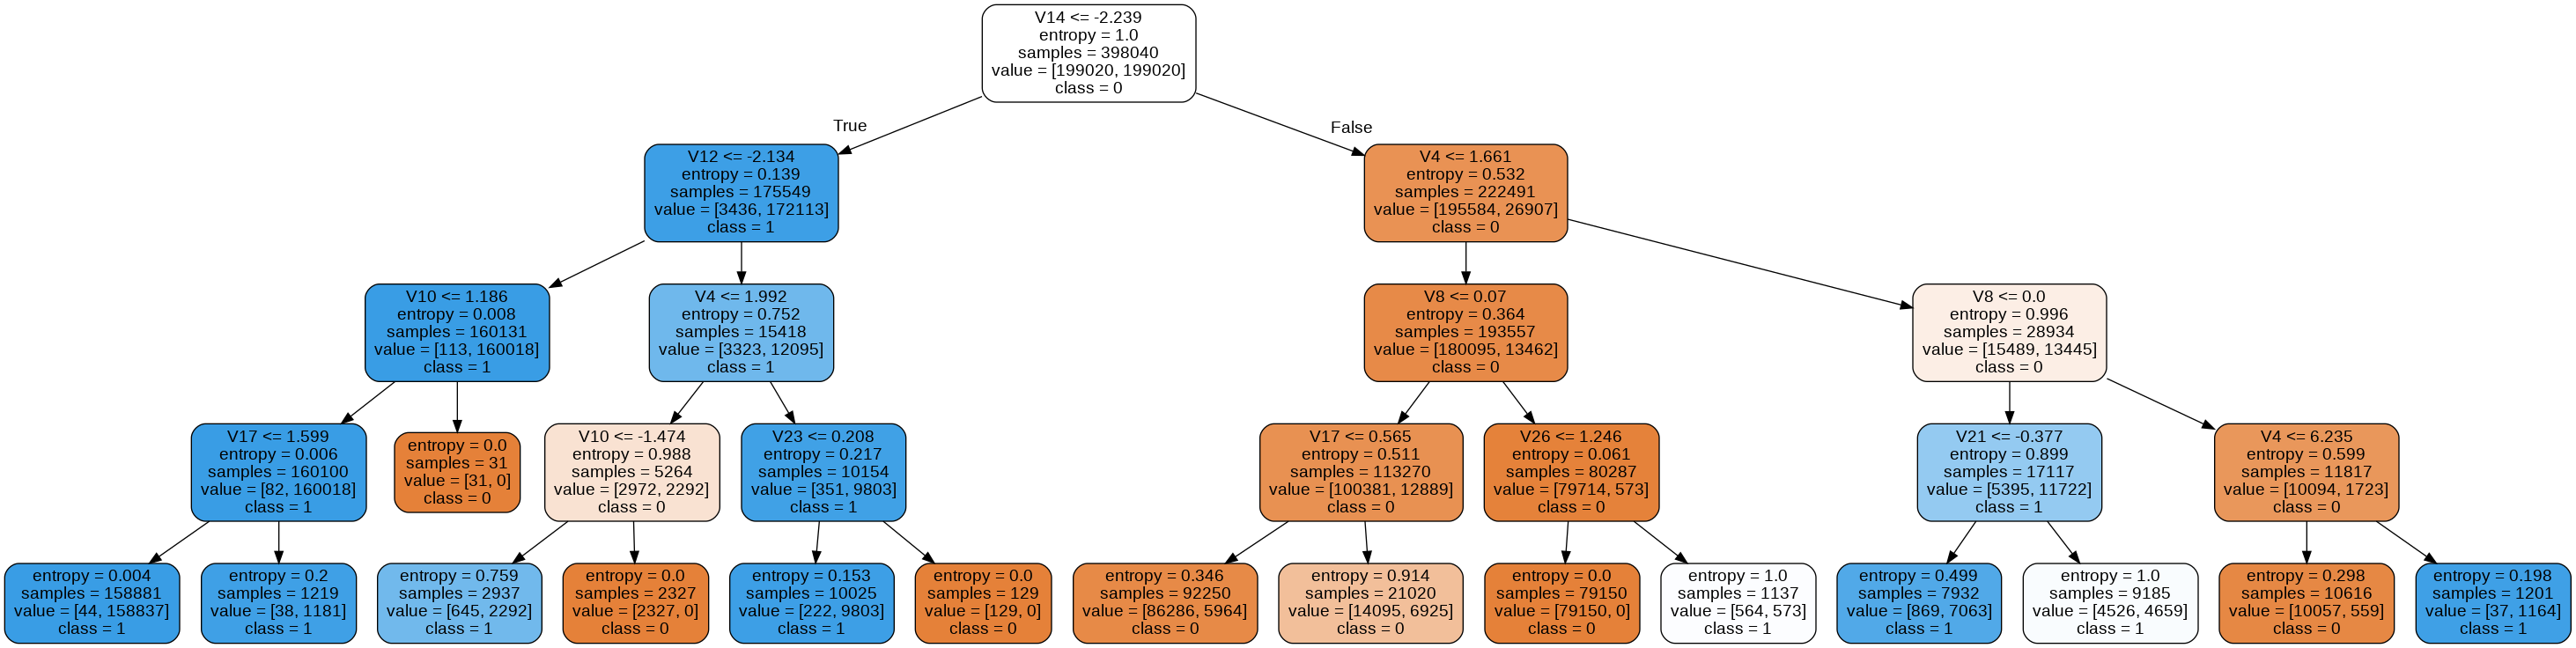

In [50]:
# criar DOT 
dot = export_graphviz(modelo_treeo, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

### **Terceiro modelo: *Floresta aleatória***

In [51]:
np.random.seed(1)
# instanciar e treinar o modelo
modelo_foresto = RandomForestClassifier(n_estimators=50, max_depth=3)
modelo_foresto.fit(X_ros,y_ros)

# fazer a previsão
y_pred_foresto = modelo_foresto.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9957    0.9977     85295
           1     0.2535    0.8446    0.3900       148

    accuracy                         0.9954     85443
   macro avg     0.6266    0.9201    0.6939     85443
weighted avg     0.9984    0.9954    0.9967     85443

Acurácia: 0.9954

AUC: 0.9201



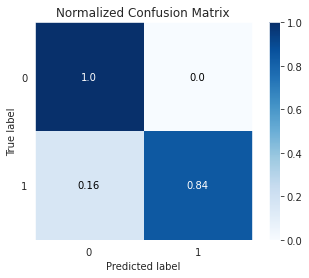

In [52]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_foresto, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_foresto, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_foresto)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_foresto)))

Acima, podemos verificar que o modelo de *Floresta Aleatória* teve uma excelente acurácia de 0.99. Porém, a detecção de fraude foi a mais baixa dentre os modelos treinados para o método *Over-sampling* de balanceamento, com apenas 0.84 de acerto.

#### Comparando o desempenho dos modelos

In [53]:
desempenho = {"Precision": [precision_score(y_test,y_pred_lr),precision_score(y_test,y_pred_lro),precision_score(y_test,y_pred_tree),precision_score(y_test,y_pred_treeo),precision_score(y_test,y_pred_forest),precision_score(y_test,y_pred_foresto)],
              "Recall_score": [recall_score(y_test,y_pred_lr),recall_score(y_test,y_pred_lro),recall_score(y_test,y_pred_tree),recall_score(y_test,y_pred_treeo),recall_score(y_test,y_pred_forest),recall_score(y_test,y_pred_foresto)],
              "F1-score": [f1_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lro),f1_score(y_test,y_pred_tree),f1_score(y_test,y_pred_treeo),f1_score(y_test,y_pred_forest),f1_score(y_test,y_pred_foresto)],
              "Accuracy": [accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_lro),accuracy_score(y_test,y_pred_tree),accuracy_score(y_test,y_pred_treeo),accuracy_score(y_test,y_pred_forest),accuracy_score(y_test,y_pred_foresto)],
              "Roc_auc_score": [roc_auc_score(y_test,y_pred_lr),roc_auc_score(y_test,y_pred_lro),roc_auc_score(y_test,y_pred_tree),roc_auc_score(y_test,y_pred_treeo),roc_auc_score(y_test,y_pred_forest),roc_auc_score(y_test,y_pred_foresto)]
}

columns_model = "LogisticRegression_under,LogisticRegression_over,DecisionTree_under,DecisionTree_over,RandomForest_under,RandomForest_over"

df_des = pd.DataFrame(desempenho.values(),index=desempenho.keys(), columns=columns_model.split(','))

df_des

,LogisticRegression_under,LogisticRegression_over,DecisionTree_under,DecisionTree_over,RandomForest_under,RandomForest_over
Precision,0.039029,0.067478,0.019790,0.041598,0.130570,0.253550
Recall_score,0.912162,0.898649,0.905405,0.858108,0.851351,0.844595
F1-score,0.074854,0.125531,0.038734,0.079350,0.226415,0.390016
Accuracy,0.960945,0.978313,0.922159,0.965509,0.989923,0.995424
Roc_auc_score,0.936596,0.938550,0.913797,0.911902,0.920757,0.920140


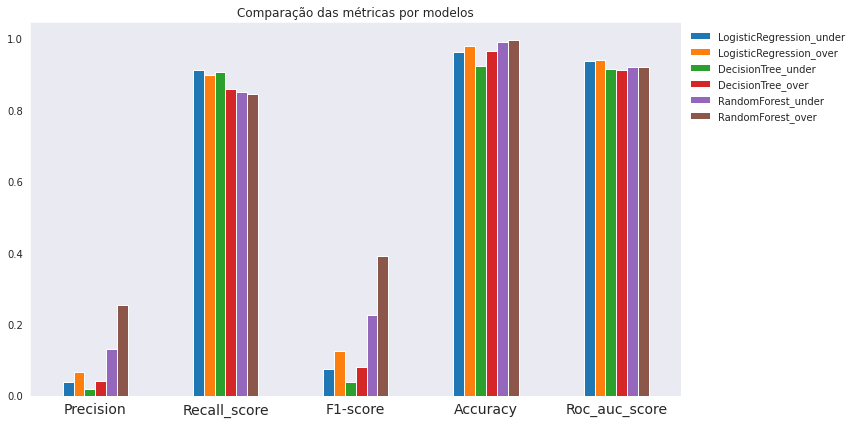

In [54]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
df_des.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.grid(False)
ax.set_title('Comparação das métricas por modelos')

plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()


## **Conclusão**

O desenvolvimento do projeto através da análise exploratória possibilitou identificar a estrutura da base de dados, assim como as principais características que as definem, tais como o fato de não haver valores ausentes, as entradas serem apenas numéricas e todas as variáveis mascaradas ja estarem *normalizadas*.

Além do mais, foi possível perceber a diferença que há entre as distribuições de transações normais e com fraudes, visto que a primeira possui picos de concentração em intervalos menores, enquanto a segunda possui maior variação, respectivamente.

Um outro fato a ser destacado é que os valores das fraudes são semelhantes aos de transações normais, isso ocorre justamente para que os desvios de dinheiro feitos passem despercebidos nas tarifas pessoais.

Com relação a implementação dos modelos de *Machine Learning*, primeiro foi realizado um algoritmo de *Regressão Logística* nos dados originais, sem balanceamento de classe, ao qual foi aplicado algumas métricas de classificação. Porém o desempenho do modelo não foi ideal para o objetivo do estudo, tendo uma avaliação de 63% no *Recall_score*, que representa a porcentagem de identificação correta de fraudes dentre todas existentes na base.

Dessa maneira, para melhorar a performance dos resultados, foram aplicadas duas técnicas de balanceamento nos dados, o *Under-sampling* e o *Over-sampling*. Feito isso, implementamos três modelos para cada método usado nas bases: a *Regressão Logística*, a *Árvore de decisão* e a *Floresta Aleatória*.

Analisando o desempenho de cada algoritmo e comparando a métrica de *Recall_score* entre eles, pois é a que representa o objetivo de estudo, obtivemos que o melhor modelo foi o de *Regressão Logística* treinado com a base de dados obtida pelo método *Under-sampling*, tendo uma porcentagem de acerto de 0.91 aproximadamente.

Vale ressaltar que a ideia do projeto é identificar mais precisamente possível a presença de fraudes nas transações bancárias. O que acaba causando uma alta detecção de *falsos positivos*, ou seja, o modelo identifica bem as operações fraudulentas, porém classifica também várias transações normais como fraudes, o que acaba gerando o bloqueio dos cartões indevidamente.

Mas lembre-se, todas essas medidas são para proteção dos clientes e constantemente modelos de *Machine Learning* são treinados em busca de melhor atender as necessidades pessoais.
 


Para saber mais informações sobre Data Science e divulgação de projetos, me acompanhem no [linkedIn](https://www.linkedin.com/in/ds-marcos-costa/) e sigam meu blog no [medium](https://medium.com/@marcoscosta1475).